In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

2023-05-01 20:03:56.003808: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


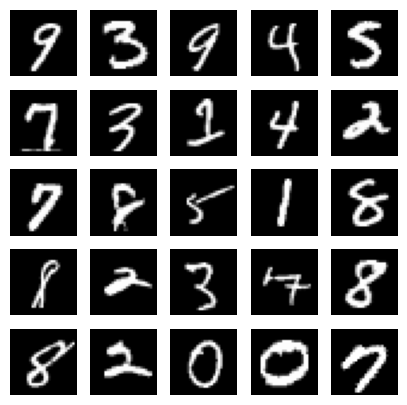

In [4]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

### Designing the model

In [5]:
#import the req. libraries

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [6]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [7]:
# one hot encoding the labels

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [9]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [11]:
model_mc = Sequential()
model_mc.add(Dense(256, activation='relu', input_shape=(784,)))
model_mc.add(Dense(128, activation='relu'))
model_mc.add(Dense(100, activation='relu'))
model_mc.add(Dense(10, activation='softmax')) 

In [12]:
#summary of the model
model_mc.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 100)               12900     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 247,766
Trainable params: 247,766
Non-trainable params: 0
_________________________________________________________________


In [13]:
#complie the model
model_mc.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model_mc.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.25)

Epoch 1/20
704/704 [==============================] - 8s 9ms/step - loss: 0.2586 - accuracy: 0.9223 - val_loss: 0.1348 - val_accuracy: 0.9600
Epoch 2/20
704/704 [==============================] - 6s 9ms/step - loss: 0.1003 - accuracy: 0.9699 - val_loss: 0.0989 - val_accuracy: 0.9688
Epoch 3/20
704/704 [==============================] - 6s 9ms/step - loss: 0.0653 - accuracy: 0.9796 - val_loss: 0.1083 - val_accuracy: 0.9675
Epoch 4/20
704/704 [==============================] - 7s 10ms/step - loss: 0.0507 - accuracy: 0.9840 - val_loss: 0.1109 - val_accuracy: 0.9692
Epoch 5/20
704/704 [==============================] - 8s 11ms/step - loss: 0.0387 - accuracy: 0.9866 - val_loss: 0.0977 - val_accuracy: 0.9735
Epoch 6/20
704/704 [==============================] - 9s 12ms/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.1222 - val_accuracy: 0.9683
Epoch 7/20
704/704 [==============================] - 7s 10ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.1096 - val_accuracy: 0.9732
Ep

In [15]:
#evaluating the model

loss, acc = model_mc.evaluate(x_test, y_test, batch_size=64)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("\nTest loss: %.1f%%" % (100.0 * loss))

157/157 [==============================] - 1s 4ms/step - loss: 0.1343 - accuracy: 0.9768

Test accuracy: 97.7%

Test loss: 13.4%


The accuracy tells us that our ANN model classifies the digits 98.3% of time correctly.